In [ ]:
# 지도학습 - Label, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식. 
# Classification 은 지도학습의 대표. 기존 데이터가 어떤 레이블에 속하는지 패턴을 
# 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별.

In [ ]:
# Decision Tree - 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 Tree 기반의 분류 규칙을 만듬.
# if else식으로 트리를 타고 내려감. 많은 규칙이 있다는것은 복잡 == 과적합. 예측 성능이 저하됨.
# 가능한 한 적은 결정 노드로 높은 예측 정확도를가지려면, 데이터를 분류할 때 최대한 많은 데이터 세트가
# 해당분류에 속할 수 있또록, 결정노드의 규칙정해져야함!!

In [ ]:
# 엔트로피는 주어진 데이터 집합의 혼잡도를 의미. 서로 다른 값이 섞여있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다.
# 머신러닝에서는 지니 계수 (0에서 가장평등 1에서 가장 불평등), 정보이득계수가 높은 조건을 찾아서, 자식 트리 노드에걸쳐
# 반복적으로 분할

In [ ]:
# 결정트리의 가장 큰 장점은 '균일도' 라는 룰을 기반으로 하고 있어, 알고리즘이 쉽고 직관적이라는 점. 
# 또한 정보의 균일도만 신경쓰면 되므로, 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요없다.
# 과적합의 단점이 크다... (트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 도움이됨!)

In [ ]:
# 결정 트리의 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지, 시각적으로 보여줄 수 있는 방법 (Graphviz 사용)
# 파이썬으로 개발된 패키지가 아님. Wrapper 모듈을 별도로 설치하여 파이썬과 인터페이스 할 수 있도록함

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_tst, y_train, y_test = train_test_split(iris_data.data, iris_data.target,\
                                                  test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [5]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names= iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

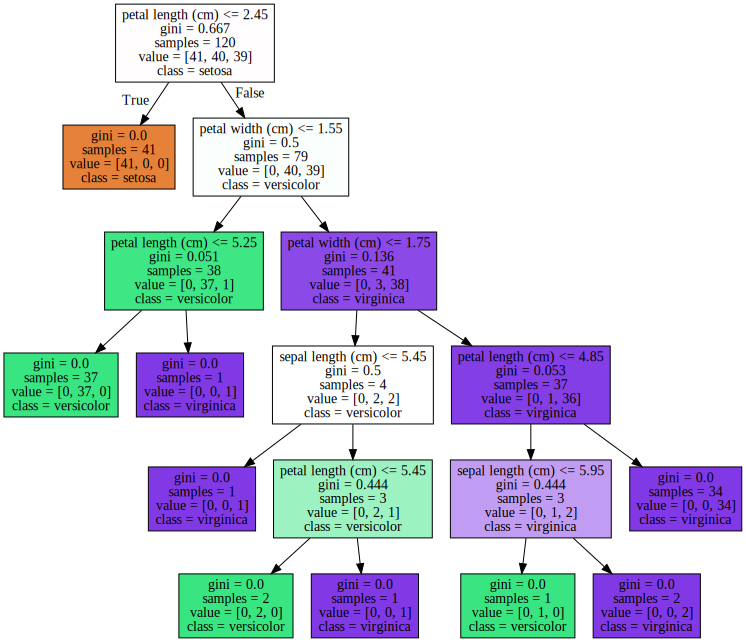

In [11]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)